# Análise Estatisica com Statsmodels

## Problema de Negócio

    Existe alguma relação entre a area de imóveis (em metros quadrados) e valor do aluguel em uma determinada cidade?
    Caso exista relação, como podemos mensurá-la?  

In [1]:
# Biblitecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

 # Dados

In [2]:
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Data_Science/DSA/ds_imoveis/ds_aluguel-imoveis.csv')

In [3]:
df.shape

(3000, 7)

In [4]:
df.columns

Index(['valor_aluguel', 'area_m2', 'ano_construcao', 'codigo_localidade',
       'numero_banheiros', 'numero_cozinhas', 'codigo_bairro'],
      dtype='object')

In [5]:
df.head()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
0,120.97436,35,1939,1,0,0,1112
1,436.97433,104,1939,1,1,0,1112
2,355.74360,29,1971,2,0,0,2114
3,282.92310,39,1972,2,0,0,2148
4,807.23080,97,1985,1,0,0,2222


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   valor_aluguel      3000 non-null   float64
 1   area_m2            3000 non-null   int64  
 2   ano_construcao     3000 non-null   int64  
 3   codigo_localidade  3000 non-null   int64  
 4   numero_banheiros   3000 non-null   int64  
 5   numero_cozinhas    3000 non-null   int64  
 6   codigo_bairro      3000 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 164.2 KB


# Análise Exploratória - Resumo Estatistico

In [15]:
display(df.isnull().sum())

valor_aluguel        0
area_m2              0
ano_construcao       0
codigo_localidade    0
numero_banheiros     0
numero_cozinhas      0
codigo_bairro        0
dtype: int64

In [16]:
display(df.describe())

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,459.643146,67.363333,1956.321333,1.441000,0.061333,0.042000,1173.798667
std,195.865692,23.675758,22.288136,0.545238,0.239981,0.200623,678.187690
min,40.512820,20.000000,1918.000000,1.000000,0.000000,0.000000,113.000000
25%,320.961530,51.000000,1939.000000,1.000000,0.000000,0.000000,561.750000
50%,426.897435,65.000000,1959.000000,1.000000,0.000000,0.000000,1025.000000
75%,560.282055,81.000000,1972.000000,2.000000,0.000000,0.000000,1714.000000
max,1843.384600,160.000000,1997.000000,3.000000,1.000000,1.000000,2529.000000


In [20]:
# Foco na variavel Alvo
display(df['valor_aluguel'].describe())

count    3000.000000
mean      459.643146
std       195.865692
min        40.512820
25%       320.961530
50%       426.897435
75%       560.282055
max      1843.384600
Name: valor_aluguel, dtype: float64

<Axes: xlabel='valor_aluguel', ylabel='Count'>

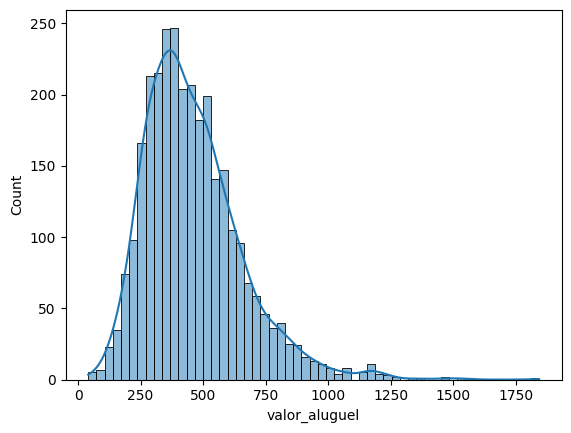

In [22]:
# Vizual
sns.histplot(data = df, x = 'valor_aluguel', kde = True)

In [23]:
# Correlacao entre as variaveis
df.corr()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
valor_aluguel,1.000000,0.584878,0.139194,0.172368,0.250261,0.170707,-0.020846
area_m2,0.584878,1.000000,-0.226581,0.110046,0.226306,0.045716,-0.089050
ano_construcao,0.139194,-0.226581,1.000000,-0.152206,0.065824,0.109881,0.327983
codigo_localidade,0.172368,0.110046,-0.152206,1.000000,0.037858,-0.004774,-0.282528
numero_banheiros,0.250261,0.226306,0.065824,0.037858,1.000000,0.064216,0.043600
numero_cozinhas,0.170707,0.045716,0.109881,-0.004774,0.064216,1.000000,0.029495
codigo_bairro,-0.020846,-0.089050,0.327983,-0.282528,0.043600,0.029495,1.000000


<Axes: >

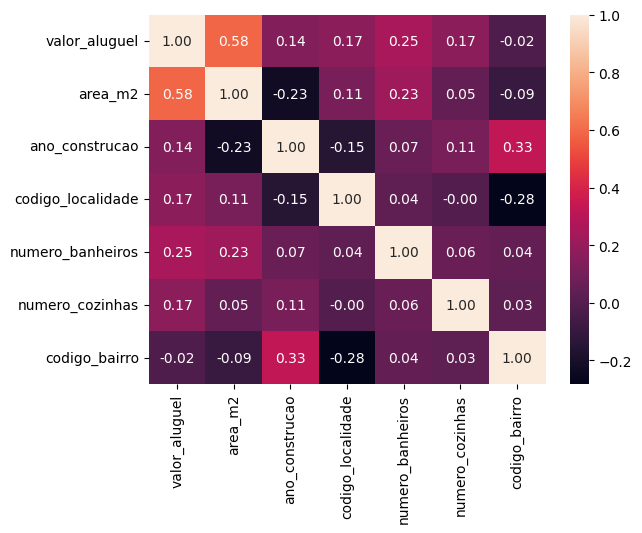

In [28]:
df_corr = df.corr()

sns.heatmap(df_corr, annot = True, fmt = '.2f')

<Axes: xlabel='area_m2', ylabel='valor_aluguel'>

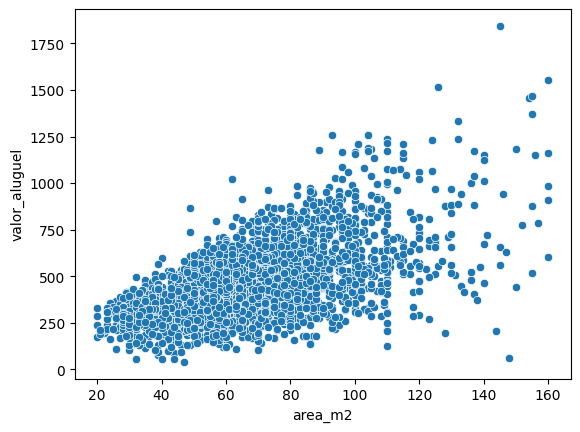

In [30]:
# Relacao entre as variaveis: valor_aluguel vs area_m2
sns.scatterplot(data=df, x = 'area_m2', y = 'valor_aluguel')

# Regressao Linear Simples